# Análisis Exploratorio de Datos sobre Siniestros Viales en la Ciudad Autónoma de Buenos Aires (2016-2021)
En el contexto urbano de la Ciudad Autónoma de Buenos Aires, los siniestros viales representan una problemática significativa con un impacto directo en la seguridad y bienestar de sus habitantes. Estos incidentes no solo se traducen en pérdidas humanas y lesiones graves sino que también conllevan consecuencias socioeconómicas considerables, afectando a familias, comunidades y al sistema de salud pública.

Este análisis exploratorio de datos se centra en el estudio de los siniestros viales ocurridos en la Ciudad de Buenos Aires durante el período 2016-2021, con el objetivo de identificar patrones, tendencias y factores de riesgo asociados a estos eventos. A través de la exploración de la base de datos homicidios_clean.xlsx, que ha sido cuidadosamente preprocesada para este fin, buscamos aportar insights valiosos que puedan servir como base para el desarrollo de políticas públicas, estrategias de prevención y campañas de concienciación orientadas a reducir la incidencia y severidad de los siniestros viales en la ciudad.

Con la utilización de herramientas y técnicas de análisis de datos, incluyendo estadística descriptiva y visualización de datos, este estudio pretende ofrecer una comprensión más profunda sobre las circunstancias y características de los siniestros viales, identificando aspectos críticos como los tipos de participantes más frecuentemente involucrados, las ubicaciones y horarios con mayor incidencia, y la evolución de estos incidentes a lo largo del tiempo. De esta manera, este proyecto aspira a contribuir al esfuerzo colectivo por mejorar la seguridad vial y reducir el número de víctimas fatales y heridos en las calles de Buenos Aires.

### Preparación del Entorno


In [99]:
# Importación de librerías para el análisis y la visualización de datos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

# Configuración de Seaborn para las visualizaciones
sns.set_theme(style="whitegrid")

# Carga de datos
homicidios = pd.read_excel('./data/homicidios_clean.xlsx')

##  Análisis Descriptivo General

In [100]:
print(homicidios.head())
print(homicidios.info())
print(homicidios.describe())

     id_caso  num_victimas      fecha  anio  mes  dia      hora  hora_exacta  \
0  2016-0001             1 2016-01-01  2016    1    1  04:00:00            4   
1  2016-0002             1 2016-01-02  2016    1    2  01:15:00            1   
2  2016-0003             1 2016-01-03  2016    1    3  07:00:00            7   
3  2016-0004             1 2016-01-10  2016    1   10  00:00:00            0   
4  2016-0005             1 2016-01-21  2016    1   21  05:20:00            5   

                                 lugar_hecho   tipo_calle  ... comuna  \
0  AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ      Avenida  ...      8   
1          AV GRAL PAZ  Y AV DE LOS CORRALES  General Paz  ...      9   
2                         AV ENTRE RIOS 2034      Avenida  ...      1   
3      AV LARRAZABAL Y GRAL VILLEGAS CONRADO      Avenida  ...      8   
4  AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA       Avenida  ...      1   

                        coordenadas_planas        lon        lat  \
0    Point (



En el marco del estudio de siniestros viales en la Ciudad Autónoma de Buenos Aires, se ha llevado a cabo un análisis exploratorio inicial de un conjunto de datos preprocesado, compuesto por 687 registros únicos. Este dataset encapsula información detallada sobre incidentes viales registrados en el período comprendido entre 2016 y 2021. A continuación, se presentan los hallazgos preliminares derivados de la evaluación descriptiva de las variables involucradas.

#### Características Generales del Dataset:
- **Variables y Tipos de Datos**: El conjunto de datos comprende 22 variables, incluyendo identificadores únicos (`id_caso`), información temporal (`fecha`, `anio`, `mes`, `dia`, `hora`, `hora_exacta`), geográfica (`lugar_hecho`, `tipo_calle`, `nombre_calle`, `direccion_normalizada`, `comuna`, `coordenadas_planas`, `lon`, `lat`), descriptiva de los involucrados (`participantes`, `victima`, `acusado`, `rol_participante`, `sexo`), y cuantitativa (`num_victimas`, `edad`).

#### Distribución Temporal:
- La temporalidad de los registros abarca desde el año 2016 hasta 2021, permitiendo un análisis longitudinal que puede revelar tendencias y patrones en la ocurrencia de siniestros viales.

#### Ubicación y Geolocalización:
- Las coordenadas geográficas (`lon`, `lat`) indican una distribución de siniestros a lo largo de la Ciudad Autónoma de Buenos Aires, con variabilidad en las `comunas` involucradas. La precisión de estas coordenadas facilitará análisis geoespaciales posteriores para identificar áreas de mayor riesgo.

#### Participantes y Víctimas:
- **Diversidad de Participantes**: Se observa una variedad en los tipos de participantes involucrados en los siniestros, con categorías que incluyen peatones, pasajeros, y diferentes tipos de vehículos, lo que sugiere una complejidad en las dinámicas de los incidentes.
- **Perfil de Víctimas**: La mayoría de las víctimas están identificadas con género `MASCULINO`, lo que podría reflejar patrones de riesgo asociados a comportamientos o roles de movilidad específicos. La edad de las víctimas varía significativamente, con una media de aproximadamente 39.7 años, lo que indica que los siniestros afectan a un amplio rango de edades.



## Análisis Temporal y Patrones

Evolución Anual de Siniestros y Víctimas:
    Año  Número de Siniestros  Total de Víctimas
0  2016                   136                140
1  2017                   131                149
2  2018                   147                159
3  2019                   100                102
4  2020                    77                 81
5  2021                    96                 96

Análisis por Mes y Estacionalidad:
    Mes  Número de Siniestros
0     1                    62
1     2                    59
2     3                    52
3     4                    46
4     5                    58
5     6                    56
6     7                    50
7     8                    66
8     9                    46
9    10                    51
10   11                    66
11   12                    75

Distribución Horaria de los Siniestros:
    Hora del Día  Número de Siniestros
0              0                    19
1              1                    25
2              2               

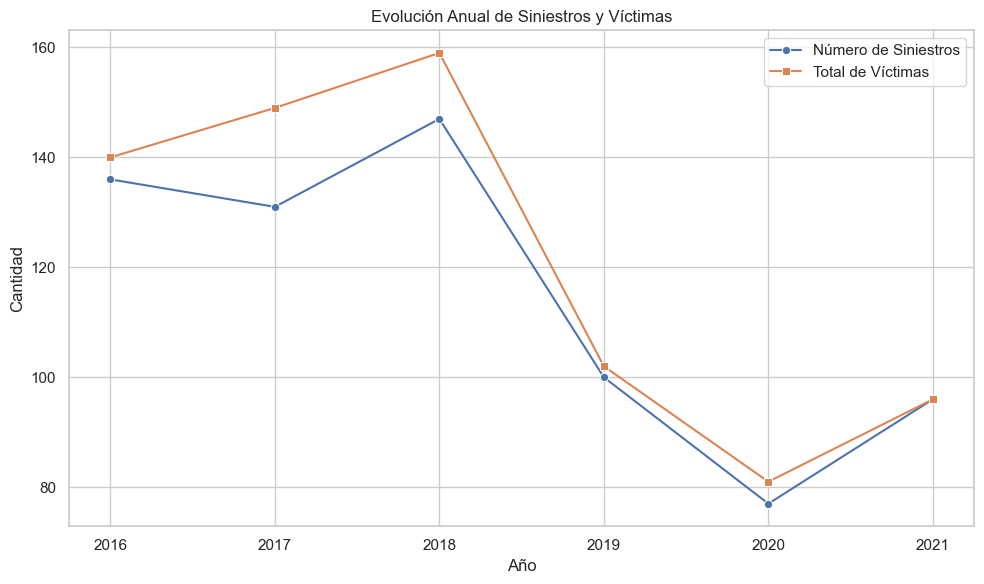

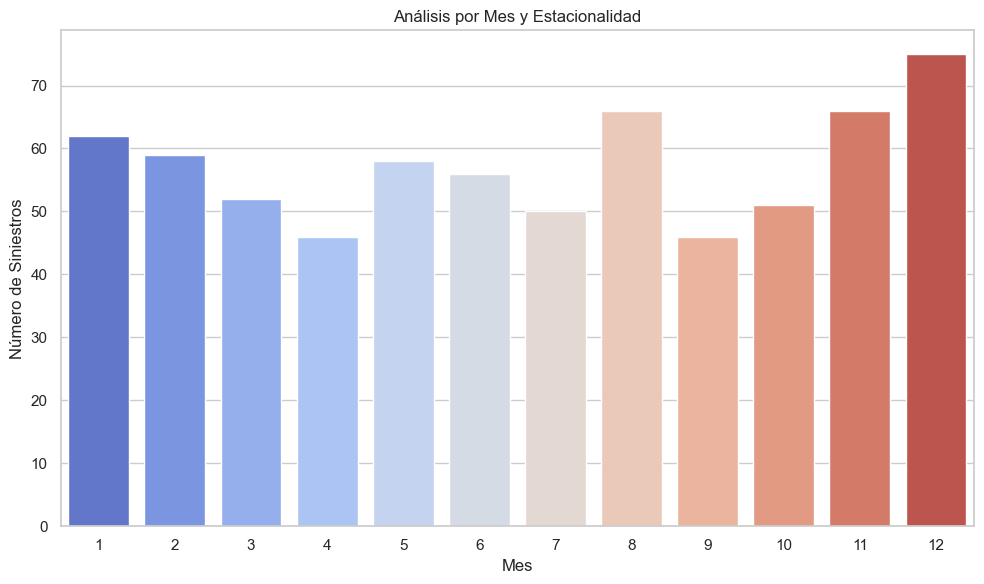

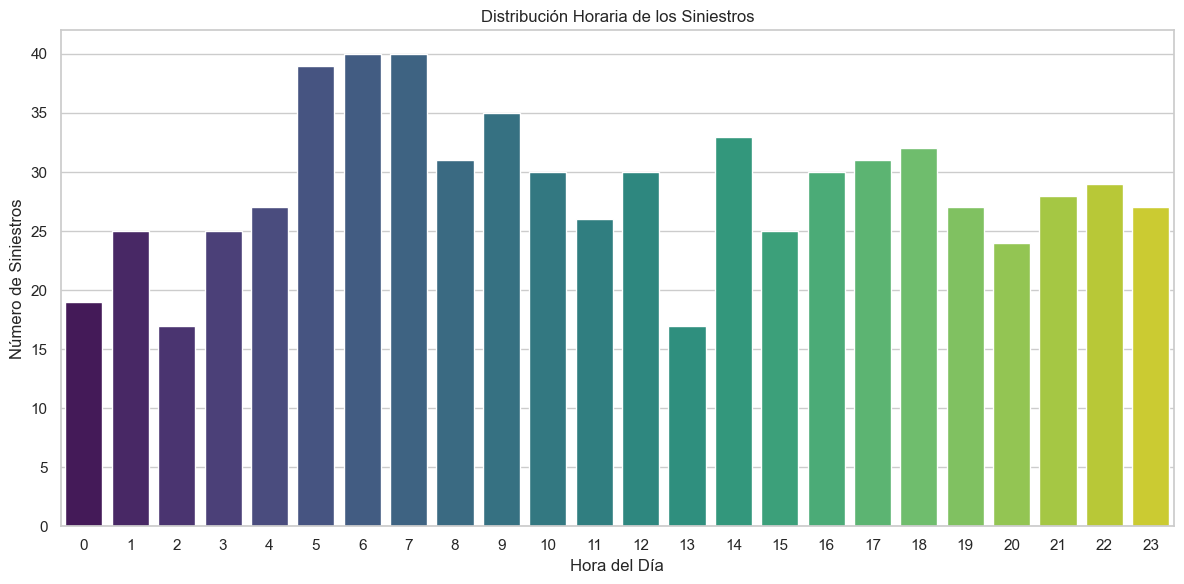

In [101]:

# Evolución Anual de Siniestros y Víctimas
evolucion_anual = homicidios.groupby('anio').agg({'id_caso':'count', 'num_victimas':'sum'}).reset_index()
evolucion_anual.columns = ['Año', 'Número de Siniestros', 'Total de Víctimas']

# Análisis por Mes y Estacionalidad
analisis_mensual = homicidios.groupby('mes').agg({'id_caso':'count'}).reset_index()
analisis_mensual.columns = ['Mes', 'Número de Siniestros']

# Distribución Horaria de los Siniestros
distribucion_horaria = homicidios.groupby('hora_exacta').agg({'id_caso':'count'}).reset_index()
distribucion_horaria.columns = ['Hora del Día', 'Número de Siniestros']

# Mostrar estadísticas tabulares
print("Evolución Anual de Siniestros y Víctimas:")
print(evolucion_anual)
print("\nAnálisis por Mes y Estacionalidad:")
print(analisis_mensual)
print("\nDistribución Horaria de los Siniestros:")
print(distribucion_horaria)

# Gráficos
# Evolución Anual de Siniestros
plt.figure(figsize=(10, 6))
sns.lineplot(x='Año', y='Número de Siniestros', data=evolucion_anual, marker='o', label='Número de Siniestros')
sns.lineplot(x='Año', y='Total de Víctimas', data=evolucion_anual, marker='s', label='Total de Víctimas')
plt.title('Evolución Anual de Siniestros y Víctimas')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Análisis por Mes
plt.figure(figsize=(10, 6))
sns.barplot(x='Mes', y='Número de Siniestros', data=analisis_mensual, palette='coolwarm')
plt.title('Análisis por Mes y Estacionalidad')
plt.xlabel('Mes')
plt.ylabel('Número de Siniestros')
plt.tight_layout()

# Distribución Horaria
plt.figure(figsize=(12, 6))
sns.barplot(x='Hora del Día', y='Número de Siniestros', data=distribucion_horaria, palette='viridis')
plt.title('Distribución Horaria de los Siniestros')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Siniestros')
plt.tight_layout()

plt.show()


#### Evolución Anual de Siniestros y Víctimas

La evolución anual de siniestros y víctimas entre 2016 y 2021 muestra una variabilidad en el número de incidentes y víctimas. Se observa un pico en 2018 con 147 siniestros y 159 víctimas, seguido de una disminución notable en 2020 a 77 siniestros y 81 víctimas, lo cual podría estar influenciado por factores externos como cambios en las políticas de tráfico o eventos globales que afectaron la movilidad.

#### Análisis por Mes y Estacionalidad

El análisis mensual revela una distribución variada a lo largo del año, con los meses de diciembre (75 siniestros), enero (62 siniestros) y noviembre (66 siniestros) presentando los mayores números de incidentes. Esto puede indicar patrones estacionales en la movilidad urbana o en las condiciones climáticas que afectan la seguridad vial.

#### Distribución Horaria de los Siniestros

La distribución horaria de los siniestros destaca un aumento en la cantidad de incidentes durante las primeras horas de la mañana, con picos entre las 5 y 7 horas. Este patrón podría estar relacionado con la actividad de inicio del día, incluyendo el tráfico de vehículos pesados, el inicio de la jornada laboral y posiblemente una menor visibilidad.

### Implicaciones

- **Planificación Urbana y Seguridad Vial**: La variabilidad anual y la estacionalidad en los siniestros sugieren la necesidad de adaptar las estrategias de seguridad vial a lo largo del año, considerando factores como las vacaciones escolares, eventos festivos y cambios estacionales en las condiciones climáticas.
  
- **Intervenciones Focalizadas**: La concentración de siniestros en ciertas horas del día llama a la implementación de medidas específicas en horarios críticos, como el refuerzo de la señalización, la regulación del tráfico pesado y campañas de concienciación sobre la conducción segura.

Este análisis resalta la importancia de una aproximación dinámica y contextualizada a la seguridad vial, donde las intervenciones y políticas deben ser sensibles a las tendencias temporales y adaptarse a las necesidades cambiantes de la movilidad urbana para reducir efectivamente los riesgos y proteger a todos los usuarios de la vía.

##  Distribución Geográfica y Análisis Espacial

In [102]:

df = homicidios.copy()

# Extraer las coordenadas y campos adicionales
df["comuna"] = df["comuna"].astype(str)
coordenadas = df[['lat', 'lon', 'comuna', 'num_victimas']]

fig = px.scatter_mapbox(coordenadas,
                        lat='lat',
                        lon='lon',
                        color='comuna',
                        size='num_victimas',
                        zoom=11.5,
                        opacity=0.5,
                        title='Mapa de Siniestros Viales en la Ciudad de Buenos Aires',
                    
                        )

# Personaliza la apariencia del mapa
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r": 0, "t": 50, "l": 0, "b": 10})
fig.update_layout(height=1000)

# Mostrar el mapa interactivo
fig.show()





#### Visualización Geoespacial de Siniestros Viales en Buenos Aires

La distribución geoespacial de los siniestros viales en la Ciudad Autónoma de Buenos Aires se ha visualizado utilizando las coordenadas de longitud y latitud. La representación gráfica revela áreas con una concentración notablemente alta de incidentes, indicando posibles zonas de riesgo dentro de la ciudad. 

#### Distribución de Siniestros por Comuna

El análisis por comuna muestra variaciones significativas en la incidencia de siniestros viales a lo largo de diferentes áreas administrativas de Buenos Aires. Algunas comunas presentan un número mayor de incidentes, lo que puede reflejar diferencias en la densidad de tráfico, el diseño urbano, y la presencia de arterias viales principales, las comunas 1, 4, 7, 8 ,9 son las que presentan mayor cantidad de siniestros viales. Estos hallazgos son fundamentales para la planificación de políticas de seguridad vial a nivel local y para la asignación de recursos en áreas con mayor necesidad de intervención.

### Implicaciones para la Prevención y Gestión de la Seguridad Vial

Los resultados del análisis geoespacial y por comuna ofrecen una perspectiva valiosa para la planificación urbana y las políticas de seguridad vial. Identificar áreas de alta concentración de siniestros permite a los responsables de la toma de decisiones focalizar recursos en intervenciones de infraestructura, campañas de concienciación, y medidas de control de tráfico que puedan mitigar efectivamente el riesgo de futuros incidentes. Además, el entendimiento detallado de la distribución de siniestros contribuye a la creación de entornos urbanos más seguros y resilientes, con un enfoque proactivo en la protección de la vida y el bienestar de los ciudadanos.



## Caracterización de Víctimas y Participantes

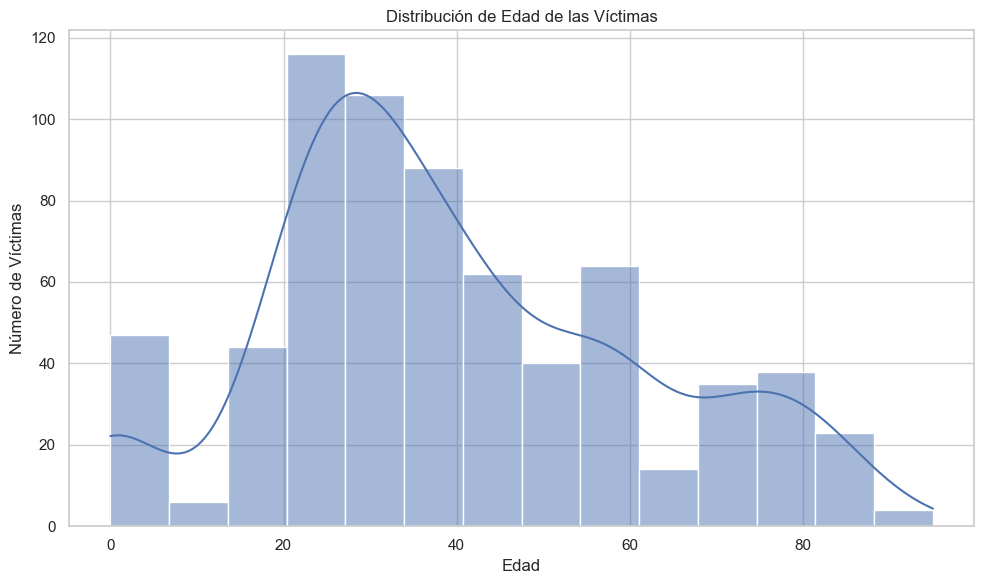

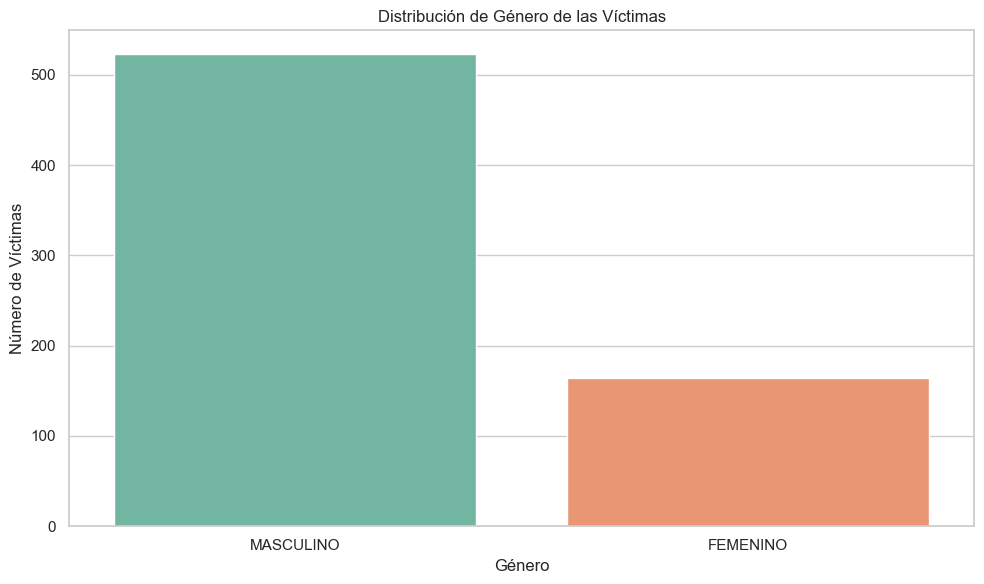

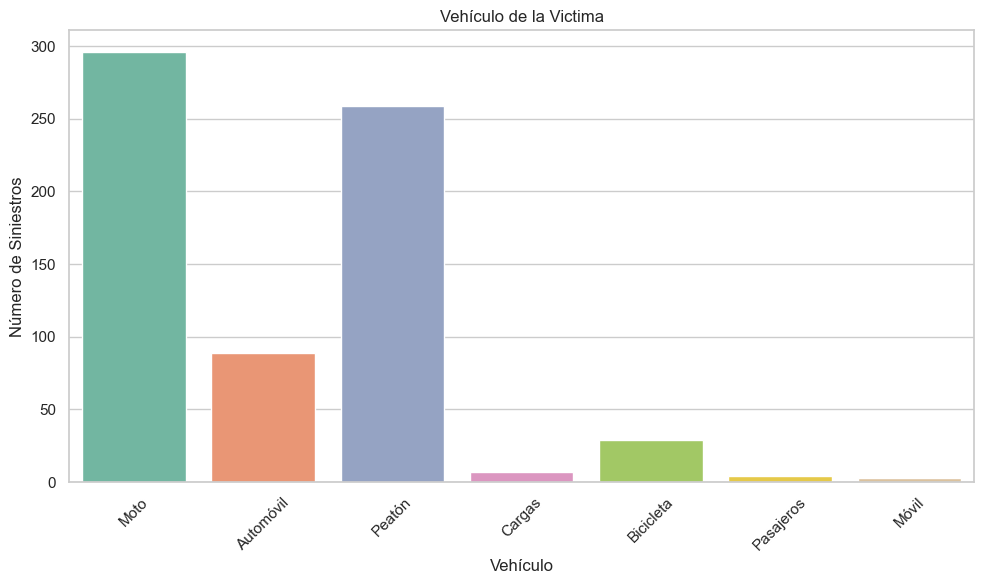

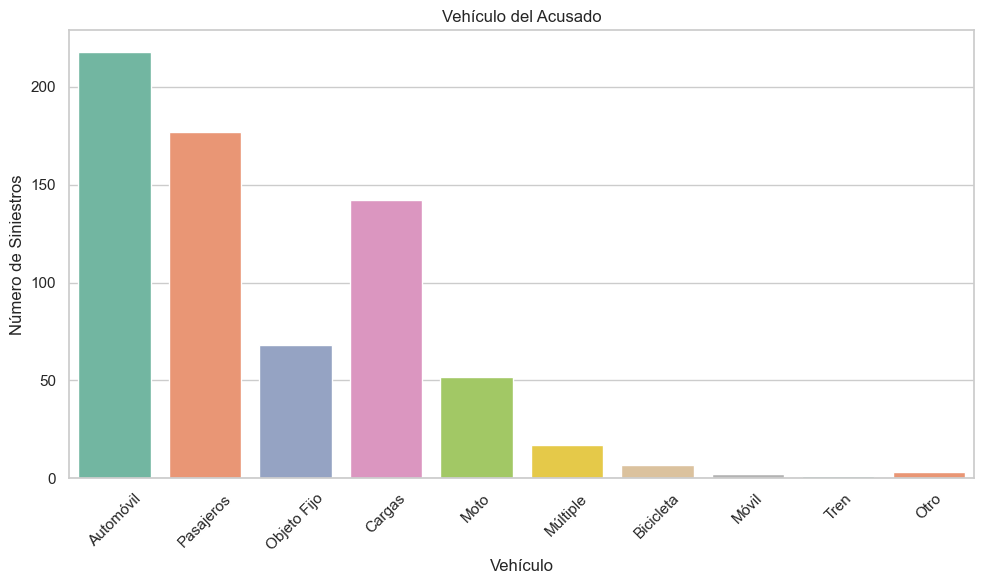

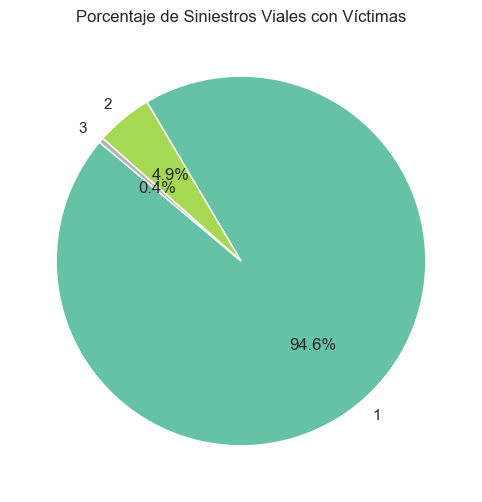

In [103]:
#  Distribución de Edad

plt.figure(figsize=(10, 6))
sns.histplot(data=homicidios, x='edad', kde=True,
             multiple='stack', palette='Set2')
plt.title('Distribución de Edad de las Víctimas')
plt.xlabel('Edad')
plt.ylabel('Número de Víctimas')
plt.tight_layout()
plt.show()


# Distribución de Género

plt.figure(figsize=(10, 6))
sns.countplot(x='sexo', data=homicidios, palette='Set2')
plt.title('Distribución de Género de las Víctimas')
plt.xlabel('Género')
plt.ylabel('Número de Víctimas')
plt.tight_layout()
plt.show()


# Vehiculo de la victima

plt.figure(figsize=(10, 6))
sns.countplot(x='victima', data=homicidios, palette='Set2')
plt.title('Vehículo de la Victima')
plt.xlabel('Vehículo')
plt.ylabel('Número de Siniestros')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Vehiculo del acusado

plt.figure(figsize=(10, 6))
sns.countplot(x='acusado', data=homicidios, palette='Set2')
plt.title('Vehículo del Acusado')
plt.xlabel('Vehículo')
plt.ylabel('Número de Siniestros')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Anásis por numero de victimas en porcentaje

# Crear un gráfico de torta
plt.figure(figsize=(10, 6))
homicidios['num_victimas'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, cmap='Set2')
plt.title('Porcentaje de Siniestros Viales con Víctimas')
plt.ylabel('')
plt.show()





### Perfil Demográfico de Víctimas

- **Distribución de Género**: La mayoría de las víctimas son masculinas, con un total de 523 casos, frente a 164 casos femeninos. Este predominio sugiere una mayor incidencia de siniestros viales entre los hombres, lo que podría reflejar diferencias en patrones de movilidad, exposición al riesgo, o comportamientos de conducción.

- **Distribución de Edad**: La edad de las víctimas varía significativamente, con una media de 39.7 años y una desviación estándar de 21.7 años. La edad mínima registrada es de 0 años y la máxima de 95 años. La distribución muestra una concentración de víctimas en el rango de 25 a 55 años, lo que indica que los adultos jóvenes y de mediana edad son particularmente afectados por los siniestros viales.

- **Recuento de víctimas por siniestro**: Mas del 94% de los siniestros viales registrados involucran una sola victima, lo que sugiere que la mayoría de los incidentes afectan a un único individuo.

### Tipos de Participantes en Siniestros

- **Víctimas**: La mayoría de las víctimas involucradas en siniestros viales pertenecen a las categorías de `Moto` (296 casos) y `Peatón` (259 casos), seguidas por `Automóvil` (87 casos). Esto resalta la vulnerabilidad de motociclistas y peatones en el entorno vial urbano.

- **Acusados**: Los tipos más comunes de acusados implicados en siniestros incluyen `Automóvil` (220 casos), `Pasajeros` (177 casos), y `Cargas` (142 casos). La presencia significativa de vehículos de carga y pasajeros como acusados sugiere complejidades en la interacción entre diferentes tipos de vehículos y usuarios de la vía.



### Implicaciones y Reflexiones

La caracterización de víctimas y participantes en siniestros viales ofrece insights críticos para el desarrollo de políticas de seguridad vial y estrategias de prevención. La prevalencia de hombres y el rango de edad destacado sugieren la necesidad de dirigir esfuerzos educativos y de prevención hacia estos grupos demográficos. Además, la vulnerabilidad de motociclistas y peatones llama a una urgente revisión y mejora de la infraestructura vial, así como a la implementación de campañas de concienciación sobre el respeto mutuo y la convivencia segura entre todos los usuarios de la vía.

Este análisis subraya la importancia de adoptar un enfoque holístico y basado en evidencia para la seguridad vial, que considere las dinámicas específicas de los diferentes tipos de participantes en el tránsito y que promueva una cultura de prevención y cuidado entre la comunidad de conductores y peatones por igual.

## Análisis de la Naturaleza de los Siniestros


Categorización de Siniestros por Tipo de Calle:
  Tipo de Calle  Cantidad
0       Avenida       436
1         Calle       130
2   General Paz        65
3     Autopista        56

Relación entre la Hora del Día y la Naturaleza del Siniestro:
    Hora del Día  Cantidad
0              0        19
1              1        25
2              2        17
3              3        25
4              4        27
5              5        39
6              6        40
7              7        40
8              8        31
9              9        35
10            10        30
11            11        26
12            12        30
13            13        17
14            14        33
15            15        25
16            16        30
17            17        31
18            18        32
19            19        27
20            20        24
21            21        28
22            22        29
23            23        27


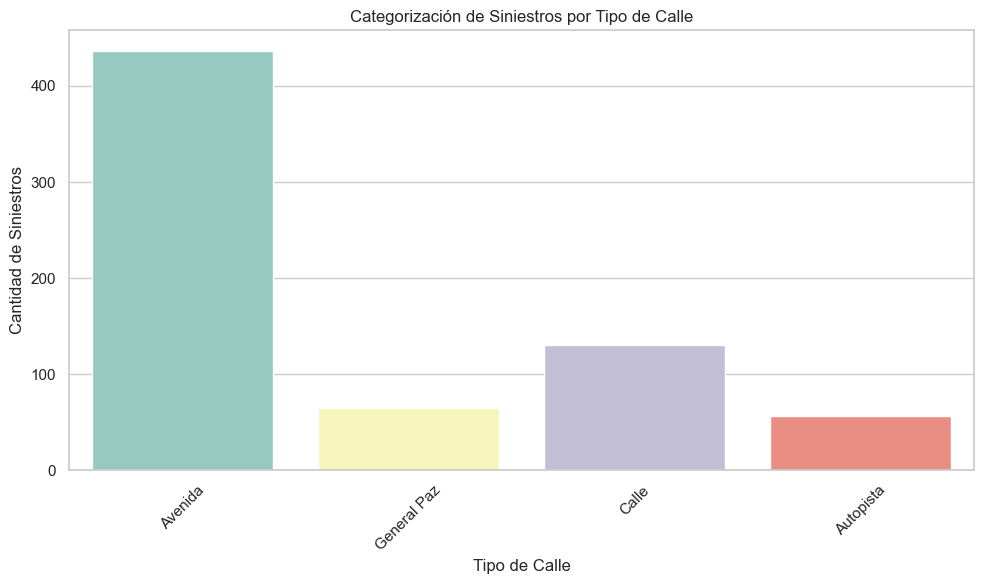

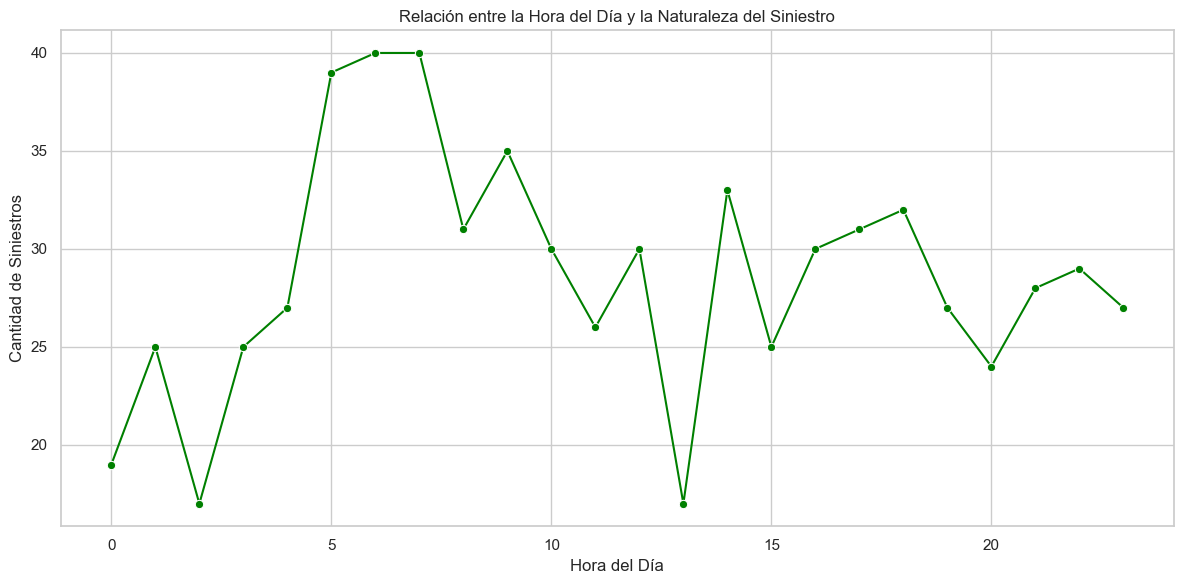

In [57]:
# Categorización de Siniestros por Tipo de Calle
tipo_calle_distribution = homicidios['tipo_calle'].value_counts().reset_index()
tipo_calle_distribution.columns = ['Tipo de Calle', 'Cantidad']

# Relación entre la Hora del Día y la Naturaleza del Siniestro
hora_siniestro_distribution = homicidios['hora_exacta'].value_counts(
).sort_index().reset_index()
hora_siniestro_distribution.columns = ['Hora del Día', 'Cantidad']

# Visualización de la Categorización de Siniestros por Tipo de Calle
plt.figure(figsize=(10, 6))
sns.countplot(x='tipo_calle', data=homicidios, palette='Set3')
plt.title('Categorización de Siniestros por Tipo de Calle')
plt.xlabel('Tipo de Calle')
plt.ylabel('Cantidad de Siniestros')
plt.xticks(rotation=45)
plt.tight_layout()

# Visualización de la Relación entre la Hora del Día y la Naturaleza del Siniestro
plt.figure(figsize=(12, 6))
sns.lineplot(x='Hora del Día', y='Cantidad',
             data=hora_siniestro_distribution, marker='o', color='green')
plt.title('Relación entre la Hora del Día y la Naturaleza del Siniestro')
plt.xlabel('Hora del Día')
plt.ylabel('Cantidad de Siniestros')
plt.grid(True)
plt.tight_layout()

# Mostrar tablas de datos tabulares para tipos de calle y relación con la hora del día
print("Categorización de Siniestros por Tipo de Calle:")
print(tipo_calle_distribution)
print("\nRelación entre la Hora del Día y la Naturaleza del Siniestro:")
print(hora_siniestro_distribution)

plt.show()


### Categorización de Siniestros por Tipo de Calle

La distribución de siniestros según el tipo de calle revela que la mayoría ocurren en `Avenidas` (436 casos), seguido por `Calles` (130 casos), `General Paz` (65 casos), y `Autopistas` (56 casos). Esta distribución sugiere una mayor incidencia de siniestros en avenidas, posiblemente debido a su mayor flujo de tráfico, intersecciones complejas, y la presencia de múltiples carriles que pueden incrementar la probabilidad de accidentes.

### Relación entre la Hora del Día y la Naturaleza del Siniestro

La relación entre la hora del día y la cantidad de siniestros muestra variaciones significativas, con picos observados en las primeras horas de la mañana (entre 5 y 7 horas) y una distribución relativamente uniforme durante el resto del día. Estos picos podrían estar relacionados con el aumento del tráfico durante las horas de inicio de la jornada laboral y posiblemente una menor visibilidad o fatiga de los conductores en horas tempranas.

### Implicaciones para la Seguridad Vial

- **Estrategias por Tipo de Calle**: La alta incidencia de siniestros en avenidas resalta la necesidad de estrategias de seguridad vial específicas para estos entornos, como la mejora de la señalización, la implementación de carriles exclusivos para ciclistas y peatones, y el reforzamiento de las normas de tráfico.

- **Intervenciones Temporales**: Los datos sugieren la importancia de enfocar esfuerzos de prevención y control en las primeras horas de la mañana, posiblemente mediante campañas de concienciación sobre los riesgos de conducir con sueño o distracciones, y el refuerzo de la presencia policial en puntos críticos durante estos horarios.



# Reporte final
## Hallazgos Principales

### Análisis Descriptivo General

El dataset compuesto por 687 registros únicos revela que los siniestros viales afectan predominantemente a hombres, con una edad media cercana a los 40 años. Este patrón demográfico subraya potenciales comportamientos de riesgo o mayor exposición al tráfico en este grupo. Además, la distribución geográfica y temporal de los siniestros sugiere que ciertas áreas y horarios están desproporcionadamente afectados, lo que indica puntos críticos específicos para intervenciones.

### Evolución Temporal de Siniestros

A lo largo del período estudiado, 2018 se destacó por tener la mayor cantidad de siniestros y víctimas, mientras que 2020 mostró una notable disminución, posiblemente debido a las restricciones de movilidad impuestas por la pandemia de COVID-19. Este cambio temporal sugiere la sensibilidad de los siniestros viales a las dinámicas urbanas y sociales, subrayando la importancia de adaptar las políticas de seguridad vial a las condiciones cambiantes.

### Patrones Estacionales y Diarios

Los análisis revelan una concentración de siniestros en los meses de verano y diciembre, coincidiendo con períodos vacacionales y festividades, lo que podría reflejar un aumento en la actividad social y el tráfico. Asimismo, las horas de la madrugada presentan un pico en la incidencia de siniestros, lo que plantea preocupaciones sobre la visibilidad, el estado de alerta de los conductores y la influencia del consumo de alcohol.

### Distribución Geográfica y Puntos Críticos

La visualización geoespacial identifica áreas con alta concentración de siniestros, particularmente en ciertas comunas y avenidas principales. Este hallazgo es crucial para dirigir esfuerzos de mejora en la infraestructura vial y la señalización, así como para focalizar campañas de concienciación en zonas de alto riesgo.

### Caracterización de Víctimas y Participantes

La distribución por tipo de participante muestra una prevalencia de conductores y peatones entre las víctimas, destacando la necesidad de fortalecer las medidas de protección para estos grupos. La frecuencia de siniestros que involucran a motocicletas y peatones resalta los riesgos asociados a estos modos de transporte, demandando acciones específicas para aumentar su seguridad.

### Naturaleza y Factores de Riesgo de los Siniestros

La categorización por tipo de calle y la relación con la hora del día iluminan aspectos críticos de la naturaleza de los siniestros. Las avenidas, por su alto flujo de tráfico y complejidad, son escenarios comunes de incidentes, mientras que las primeras horas del día muestran una vulnerabilidad particular, sugiriendo factores como la fatiga y la baja visibilidad.

## Conclusiones y Recomendaciones

Este estudio evidencia la compleja interacción de factores demográficos, temporales, geográficos y conductuales que influyen en los siniestros viales en Buenos Aires. Se recomienda:

1. **Implementar Políticas de Seguridad Vial Dinámicas**: Adaptar estrategias a las tendencias temporales y a los cambios en el comportamiento social y la movilidad.
2. **Fortalecer la Infraestructura en Puntos Críticos**: Mejorar la señalización, iluminación y diseño de vías en zonas de alta incidencia.
3. **Promover la Educación y Concienciación**: Incrementar las campañas de seguridad vial dirigidas a conductores jóvenes, motociclistas y peatones, enfatizando los riesgos específicos de cada grupo.
4. **Fomentar la Investigación y el Análisis de Datos Continuo**: Utilizar la recolección y análisis de datos en tiempo real para monitorear la efectividad de las intervenciones y ajustar las políticas públicas según sea necesario.

La colaboración entre el gobierno, organizaciones de la sociedad civil y la comunidad es fundamental para abordar efectivamente la problemática de los siniestros viales, con el objetivo último de salvaguardar la vida y promover un entorno urbano seguro para todos.